In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

# Load the data
path = "air_quality.csv"
df = pd.read_csv(path)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

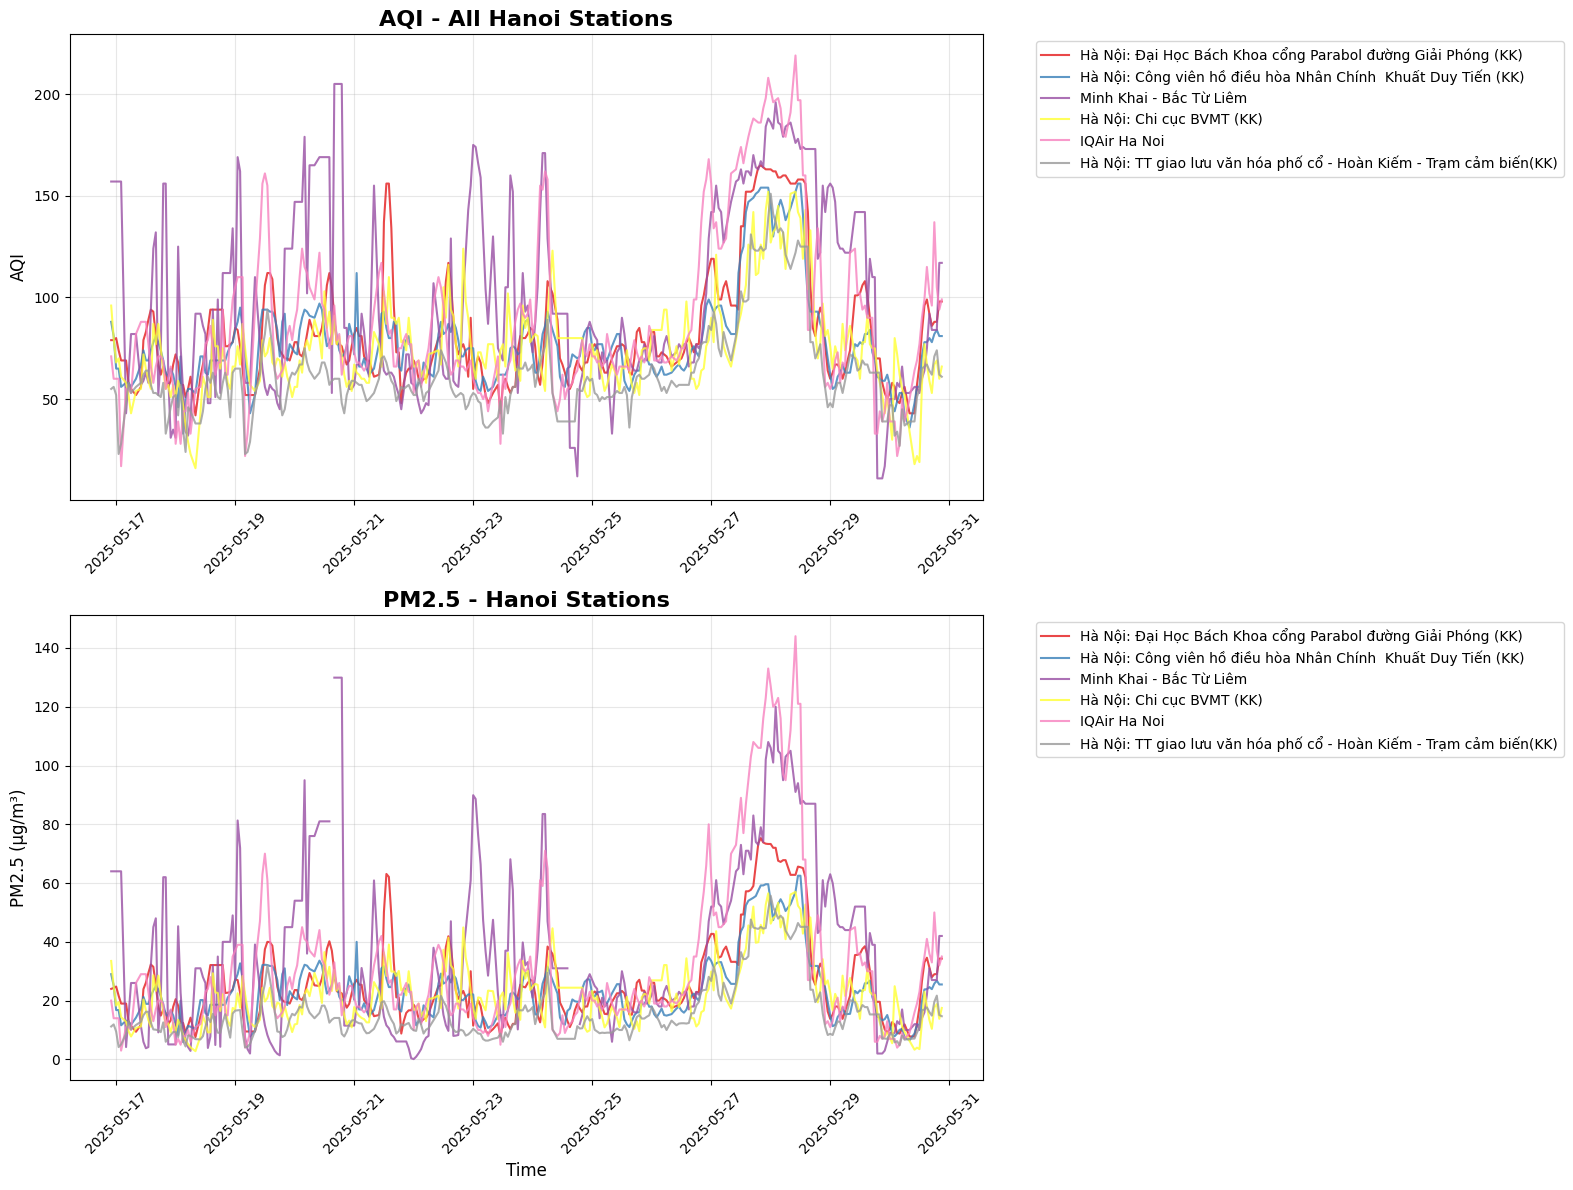

In [4]:
# Define Hanoi stations
hanoi_stations = [
    'Hà Nội: Đại Học Bách Khoa cổng Parabol đường Giải Phóng (KK)',
    'Hà Nội: Công viên hồ điều hòa Nhân Chính  Khuất Duy Tiến (KK)',
    'Minh Khai - Bắc Từ Liêm',
    'Hà Nội: Chi cục BVMT (KK)',
    'IQAir Ha Noi',
    'Hà Nội: TT giao lưu văn hóa phố cổ - Hoàn Kiếm - Trạm cảm biến(KK)'
]

hanoi_df_list = []

for station in hanoi_stations:
    station_data = df[df['station_name'] == station].copy()
    if len(station_data) > 0:
        station_recent = station_data.sort_values('timestamp').tail(307)
        hanoi_df_list.append(station_recent)

hanoi_df = pd.concat(hanoi_df_list, ignore_index=True)
hanoi_df = hanoi_df.sort_values('timestamp')

for station in hanoi_stations:
    station_data = hanoi_df[hanoi_df['station_name'] == station]
    
def plot_hanoi_time_series():
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

    colors = plt.cm.Set1(np.linspace(0, 1, len(hanoi_stations)))
    
    for i, station in enumerate(hanoi_stations):
        station_data = hanoi_df[hanoi_df['station_name'] == station]

        ax1.plot(station_data['timestamp'], station_data['aqi'], 
            label=station, color=colors[i], alpha=0.8, linewidth=1.5)
    
    ax1.set_title('AQI - All Hanoi Stations', fontsize=16, fontweight='bold')
    ax1.set_ylabel('AQI', fontsize=12)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot PM2.5 time series
    for i, station in enumerate(hanoi_stations):
        station_data = hanoi_df[hanoi_df['station_name'] == station]

        ax2.plot(station_data['timestamp'], station_data['PM2.5 (µg/m³)'], 
            label=station, color=colors[i], alpha=0.8, linewidth=1.5)
    
    ax2.set_title('PM2.5 - Hanoi Stations', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Time', fontsize=12)
    ax2.set_ylabel('PM2.5 (µg/m³)', fontsize=12)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Create the time series plots
plot_hanoi_time_series()
